In [3]:
import numpy as np

✍ Мы познакомились с задачами линейного программирования, и теперь пришло время научиться решать их с использованием функций Python.

В языке Python есть множество библиотек, с помощью которых можно решить задачу линейного программирования. Вот основные, которые мы рассмотрим в данном юните:

+ **SciPy** (scipy.optimize.linprog);
+ **CVXPY**; 
+ **PuLP**.

У каждой библиотеки есть свои особенности использования, и большинство задач можно решить с помощью любой из них. Давайте посмотрим все варианты, чтобы у вас всегда был выбор — решим по одной задаче для каждой библиотеки.

**Пример № 1. SciPy (scipy.optimize.linprog)**

У нас есть 6 товаров с заданными ценами на них и заданной массой.

Вместимость сумки, в которую мы можем положить товары, заранее известна и равна 15 кг.

Какой товар и в каком объёме необходимо взять, чтобы сумма всех цен товаров была максимальной?

Создадим переменные на основе предложенных данных:

In [1]:
values = [4, 2, 1, 7, 3, 6] #стоимости товаров
weights = [5, 9, 8, 2, 6, 5] #вес товаров
C = 15 #вместимость сумки
n = 6 #количество товаров

Сформулируем задачу линейного программирования. Максимизируем произведение стоимости на количество, учитывая, что произведение веса на искомое количество товаров должно укладываться во вместимость сумки:

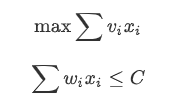

Из предыдущего юнита мы уже знаем, что в векторно-матричной форме наша задача должна формулироваться в следующем виде:

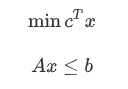

Получается, что в наших обозначениях мы имеем следующее:

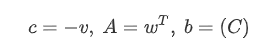

Здесь нам необходимо вспомнить линейную алгебру, так как очень важно, чтобы векторы были в нужных нам размерностях, иначе мы не сможем использовать матричное умножение. Вектор $A$ размера $6$ мы превращаем в матрицу размера $(1,6)$ с помощью функции expand_dims(). Создаём все необходимые переменные:

In [4]:
c = - np.array(values) #изменяем знак, чтобы перейти от задачи максимизации к задаче минимизации
A = np.array(weights)  #конвертируем список с весами в массив
A = np.expand_dims(A, 0) #преобразуем размерность массива
b = np.array([C]) #конвертируем вместимость в массив

Передаём подготовленные переменные в оптимизатор SciPy:

In [5]:
from scipy.optimize import linprog
linprog(c=c, A_ub=A, b_ub=b)

     con: array([], dtype=float64)
     fun: -52.50000000003075
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-2.24904539e-11])
  status: 0
 success: True
       x: array([6.18738537e-14, 1.05853307e-12, 1.21475944e-13, 7.50000000e+00,
       4.00246695e-13, 4.71394166e-13])

Получаем искомое значение функции — $52.5$ (в выводе значение с минусом, но мы меняем знак, возвращаясь к задаче максимизации). $x = (0, 0, 0, 7.5, 0, 0)$. Таким образом, мы взяли только самую дорогую, четвёртую вещь. Она одна весит 2 кг, а если взять её 7.5 раз, то получится как раз 15 кг. Отлично, задача решена.

**Пример № 2. CVXPY**

Снова решим задачу из примера № 1, но уже предположим, что товары нельзя дробить, и будем решать задачу целочисленного линейного программирования.

SciPy не умеет решать такие задачи, поэтому будем использовать новую библиотеку CVXPY.

### Важно! С установкой этот библиотеки порой возникают проблемы. Если вы столкнулись с трудностями, посоветуйтесь с ментором или воспользуйтесь Google Colaboratory.

In [8]:
import cvxpy

values = [4, 2, 1, 7, 3, 6] #стоимости товаров
weights = [5, 9, 8, 2, 6, 5] #вес товаров
C = 15 #вместимость сумки
n = 6 #количество товаров

c = - np.array(values) #изменяем знак, чтобы перейти от задачи максимизации к задаче минимизации
A = np.array(weights)  #конвертируем список с весами в массив
A = np.expand_dims(A, 0) #преобразуем размерность массива
b = np.array([C]) #конвертируем вместимость в массив

С помощью CVXPY создадим переменную-массив. Укажем его размерность, а также условие, что все числа в массиве должны быть целыми:

In [9]:
x = cvxpy.Variable(shape=n, integer = True)

Далее зададим ограничения, используя матричное умножение:

In [10]:
constraint = (A @ x <= b)
total_value = c * x

/usr/local/lib/python3.8/dist-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


Переходим непосредственно к решению задачи:

In [11]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint])

Вызываем получившееся решение:

In [12]:
problem.solve()

-inf

### В результате получаем бесконечность. Это совершенно нереалистично.

В таком случае будем рассматривать только положительные значения $x$:

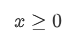

В переформулированном виде задача будет решаться следующим образом:

In [13]:
x = cvxpy.Variable(shape=n, integer=True)
constraint = (A @ x <= b)
x_positive = (x >= 0)
total_value = c * x
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve()


/usr/local/lib/python3.8/dist-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


-49.0

In [14]:
x.value

array([0., 0., 0., 7., 0., 0.])

Здесь мы уже получаем $49$, и берём только четвёртый товар в количестве семи штук. Можно увидеть, что результат, в целом, очень близок к первому, когда мы использовали библиотеку SciPy — различие лишь в добавлении целочисленности. Значит, у нас получилось решить задачу, когда мы добавили недостающее условие.

А что если мы можем брать не любое количество товаров, а только один или не брать их вовсе? Задаём $x$ типа *boolean*.

$x = 0$ или $x = 1$

Программное решение такой задачи имеет следующий вид:

In [15]:
x = cvxpy.Variable(shape=n, boolean=True)
constraint = A @ x <= b
x_positive = x >= 0
total_value = c * x
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve()

/usr/local/lib/python3.8/dist-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)


-17.0

In [16]:
x.value

array([1., 0., 0., 1., 0., 1.])

Получим стоимость, равную $17$, взяв первый, четвёртый и шестой товары.

### Обратите внимание, что, используя *SciPy*, мы могли не указывать явно, что $x$ только положительные, так как в линейном программировании считаются только неотрицательные $x$.

### А вот CVXPY универсальна. Мы просто задали функцию, не указывая, что это линейное программирование. CVXPY «поняла», что это задача оптимизации, и использовала нужные алгоритмы. Поэтому здесь ограничение на положительные $x$ мы указывали явно.

**Пример № 3. PuLP**

В нашей каршеринговой компании две модели автомобилей: модель $A$ и модель $B$. Автомобиль $A$ даёт прибыль в размере 20 тысяч в месяц, а автомобиль $B$ — 45 тысяч в месяц. Мы хотим заказать на заводе новые автомобили и максимизировать прибыль. Однако на производство и ввод в эксплуатацию автомобилей понадобится время:

+ Проектировщику требуется 4 дня, чтобы подготовить документы для производства каждого автомобиля типа $A$, и 5 дней — для каждого автомобиля типа $B$.
+ Заводу требуется 3 дня, чтобы изготовить модель $A$, и 6 дней, чтобы изготовить модель $B$.
+ Менеджеру требуется 2 дня, чтобы ввести в эксплуатацию в компании автомобиль $A$, и 7 дней —  автомобиль $B$.
+ Каждый специалист может работать суммарно 30 дней.

Целевая функция будет выглядеть следующим образом:

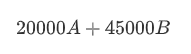

Также запишем ограничения:

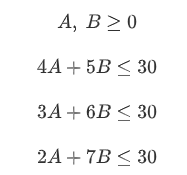

Заметьте, что здесь мы снова пишем обычные неравенства, а не условия в матричном виде. Дело в том, что для данной библиотеки так «удобнее», так как она принимает все условия в «первичном» виде.

In [18]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 43.2 MB/s eta 0:00:00


In [19]:
from pulp import *

In [20]:
problem = LpProblem('Производство машин', LpMaximize)
A = LpVariable('Автомобиль A', lowBound=0 , cat=LpInteger)
B = LpVariable('Автомобиль B', lowBound=0 , cat=LpInteger)
#Целевая функция
problem += 20000*A + 45000*B 
#Ограничения
problem += 4*A + 5*B <= 30 
problem += 3*A + 6*B <=30
problem += 2*A + 7*B <=30
problem.solve()
print("Количество автомобилей модели А: ", A.varValue)
print("Количество автомобилей модели В: ", B.varValue)
print("Суммарный доход: ", value(problem.objective))

Количество автомобилей модели А:  1.0
Количество автомобилей модели В:  4.0
Суммарный доход:  200000.0


/usr/local/lib/python3.8/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Выходит, что необходимо произвести 1 автомобиль типа $A$ и 4 автомобиля типа $B$. Тогда суммарный чистый доход будет равен 200 тысячам.